In [1]:
# Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Get raw 2.1.1 data
%store -r data_frame_2_2Confidence
data_frame = data_frame_2_2Confidence

In [4]:
# Get quantity of subjects initially:
len(data_frame['uniqueid'].unique())

7

In [5]:
study_test_df = data_frame.query('block > 0 and trial_ilk == trial_ilk')
test_df = study_test_df.query('trial_ilk == "test"')

In [6]:
test_df['correct'] = test_df['correct_side'] == test_df['chosen_side']
acc_df = test_df.groupby('uniqueid').agg({'correct': 'mean'}).reset_index()

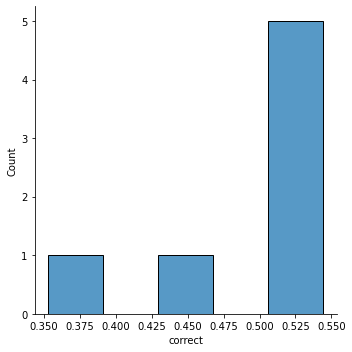

In [7]:
fig = sns.displot(x='correct', data=acc_df)
fig.savefig('accuracy_dist.pdf')

In [8]:
test_df['more_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].min(axis=1)
test_df['less_recent_probe'] = test_df[['left_comp_type', 'right_comp_type']].max(axis=1)

In [9]:
acc_by_comp_type_df = test_df.groupby(['uniqueid', 'more_recent_probe', 'less_recent_probe']).agg({'correct': 'mean'}).reset_index()

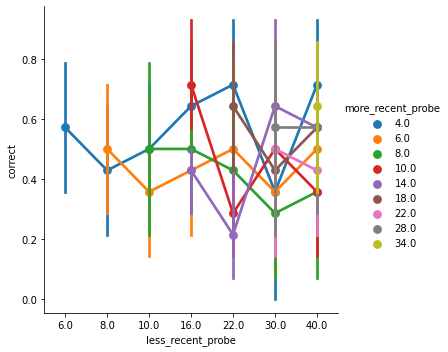

In [10]:
#rel
# sns.relplot(x='less_recent_probe', y='correct', hue='more_recent_probe', data=acc_by_comp_type_df, kind='line')
sns.catplot(x='less_recent_probe', y='correct', hue='more_recent_probe', data=acc_by_comp_type_df, kind='point')

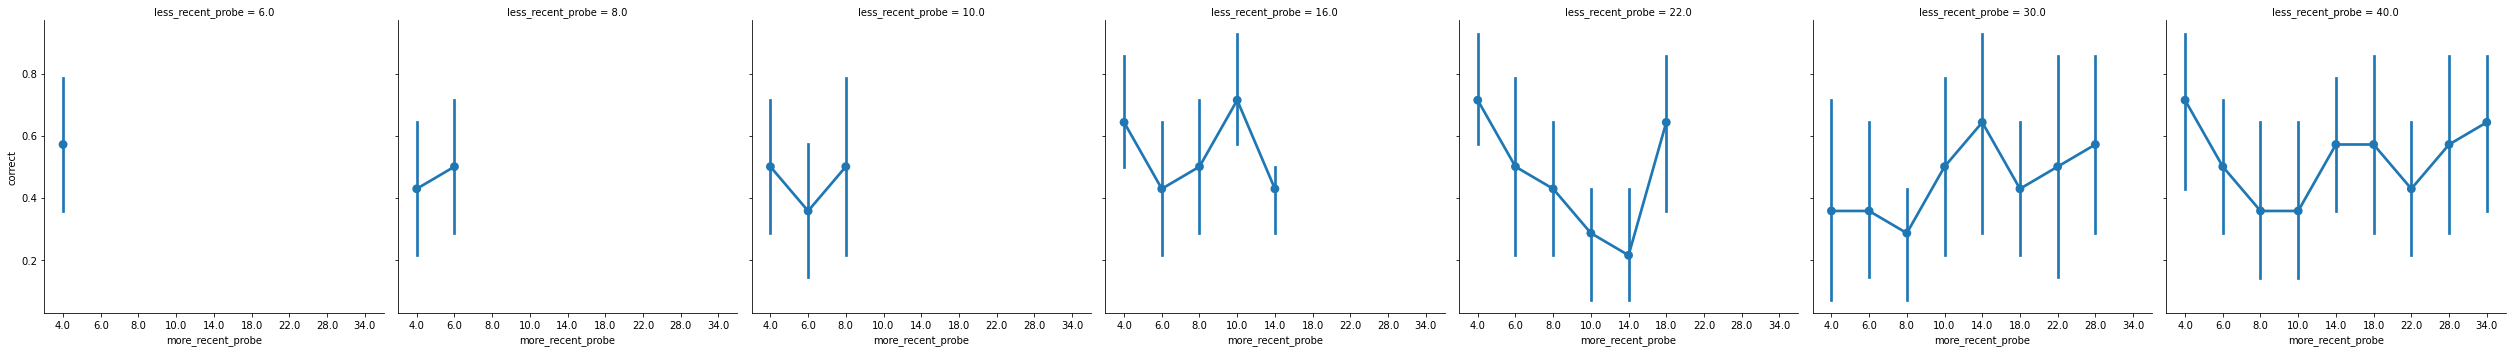

In [11]:
sns.catplot(x='more_recent_probe', y='correct', col='less_recent_probe', data=acc_by_comp_type_df, kind='point')